In [2]:
import os
import numpy as np
import math
import pandas as pd
from collections import Counter
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [3]:
train1 = pd.read_csv('trainData1.csv',header=None)
train2 = pd.read_csv('trainData2.csv',header=None)
train3 = pd.read_csv('trainData3.csv',header=None)
train4 = pd.read_csv('trainData4.csv',header=None)
train5 = pd.read_csv('trainData5.csv',header=None)
train6 = pd.read_csv('trainData6.csv',header=None)
train7 = pd.read_csv('trainData7.csv',header=None)
train8 = pd.read_csv('trainData8.csv',header=None)
train9 = pd.read_csv('trainData9.csv',header=None)
train10 = pd.read_csv('trainData10.csv',header=None)
label1 = pd.read_csv('trainLabels1.csv',header=None)
label2 = pd.read_csv('trainLabels2.csv',header=None)
label3 = pd.read_csv('trainLabels3.csv',header=None)
label4 = pd.read_csv('trainLabels4.csv',header=None)
label5 = pd.read_csv('trainLabels5.csv',header=None)
label6 = pd.read_csv('trainLabels6.csv',header=None)
label7 = pd.read_csv('trainLabels7.csv',header=None)
label8 = pd.read_csv('trainLabels8.csv',header=None)
label9 = pd.read_csv('trainLabels9.csv',header=None)
label10 = pd.read_csv('trainLabels10.csv',header=None)
test = pd.read_csv('testData.csv',header=None)
test_label = pd.read_csv('testLabels.csv',header=None)

In [4]:
train=[train1,train2,train3,train4,train5,train6,train7,train8,train9,train10]
labels=[label1,label2,label3,label4,label5,label6,label7,label8,label9,label10]

In [218]:
errorate=[]
for r in range(1,31):
    total=0
    for i in range(len(train)):
        valset=np.array(train[i])
        labels_val=np.array(labels[i])


        trainset=train[:i]+train[i+1:]
        labels_train=labels[:i]+labels[i+1:]

        dataset=np.concatenate((trainset[0],trainset[1],trainset[2],trainset[3],trainset[4],trainset[5],trainset[6],trainset[7],trainset[8]),axis=0)
        labelset=np.concatenate((labels_train[0],labels_train[1],labels_train[2],labels_train[3],labels_train[4],labels_train[5],labels_train[6],labels_train[7],labels_train[8]),axis=0)
        labelset_l=labelset.flatten()

        prediction=[]

        for j in range(len(valset)):
            d=[]
            for l in range(len(dataset)):
                distance=np.sqrt(np.sum(np.square(valset[j]-dataset[l])))
                d.append([distance,l])
            distances=sorted(d)
            target=[]

            for n in range(r):
                index=distances[n][1]
                target.append(labelset_l[index])

            a=Counter(target).most_common(1)[0][0]
            prediction.append(a)

        accu=accuracy_score(labels_val,prediction)
        total=total+accu

    mean=total/10    
    errorate.append(mean)

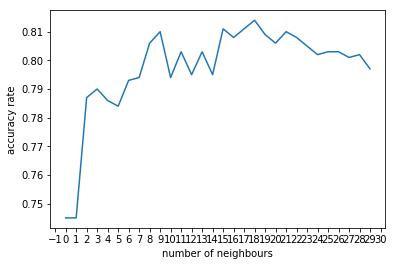

In [236]:
x=range(len(errorate))
ax=plt.plot(x,errorate)
plt.xlabel('number of neighbours')
plt.ylabel('accuracy rate')
ax=plt.gca()
ax.locator_params('x',nbins=32)

In [21]:
train_tot=np.concatenate((train1,train2,train3,train4,train5,train6,train7,train8,train9,train10),axis=0)
label_tot=np.concatenate((label1,label2,label3,label4,label5,label6,label7,label8,label9,label10),axis=0).flatten()
test = np.array(pd.read_csv('testData.csv',header=None))
test_label = np.array(pd.read_csv('testLabels.csv',header=None))

In [31]:
prediction=[]
for j in range(len(test)):
            d=[]
            for l in range(len(train_tot)):
                distance=np.sqrt(np.sum(np.square(test[j]-train_tot[l])))
                d.append([distance,l])
            
            distances=sorted(d)
            target=[]
            
            for n in range(19):
                index=distances[n][1]
                target.append(label_tot[index])

            a=Counter(target).most_common(1)[0][0]
            prediction.append(a)

accu=accuracy_score(test_label,prediction)

In [32]:
accu

0.7272727272727273